# Import Libraries and Datasets

In [31]:
import pandas as pd
import missingno as mg
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [32]:
def plot_distribution(df):
    '''
    Description:
    Plot distribution charts (histograms with KDE) for all numerical features of a given Pandas DataFrame.

    Parameters: df (pd.DataFrame): The input DataFrame.

    Returns: None
    '''
    numerical_features = [col 
                          for col 
                          in df.columns 
                          if pd.api.types.is_numeric_dtype(df[col])]
    print(f'The number of numerical features is {len(numerical_features)}')
    
    # Distribution of numerical variables
    nrows = math.ceil(len(numerical_features) / 3)
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=(13, 3 * nrows))  # Adjust height for better spacing
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_features):
        sns.histplot(df[col], 
                     kde=True, 
                     ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle('Distribution plots of the dataset', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Function to plot correlation matrix of numerical features of pandas dataframe.
def plot_correlation(df):
    '''
    Description:
    Plot a heatmap of the correlation matrix for all numerical features of a given Pandas DataFrame.

    Parameters: df (pd.DataFrame): The input DataFrame.

    Returns: None
    '''
    numerical_features = [col 
                          for col 
                          in df.columns 
                          if pd.api.types.is_numeric_dtype(df[col])]

    # Plotting the heatmap
    correlation_matrix = df[numerical_features].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                fmt='.2f', 
                linewidths=.5)
    plt.title('Correlation Matrix')
    plt.show()

In [33]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Exploratory Data Analysis

In [34]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [35]:
print(f'Percentage of missing values in Rating column: {(7590/15509)}')


Percentage of missing values in Rating column: 0.48939325552904767


<Axes: >

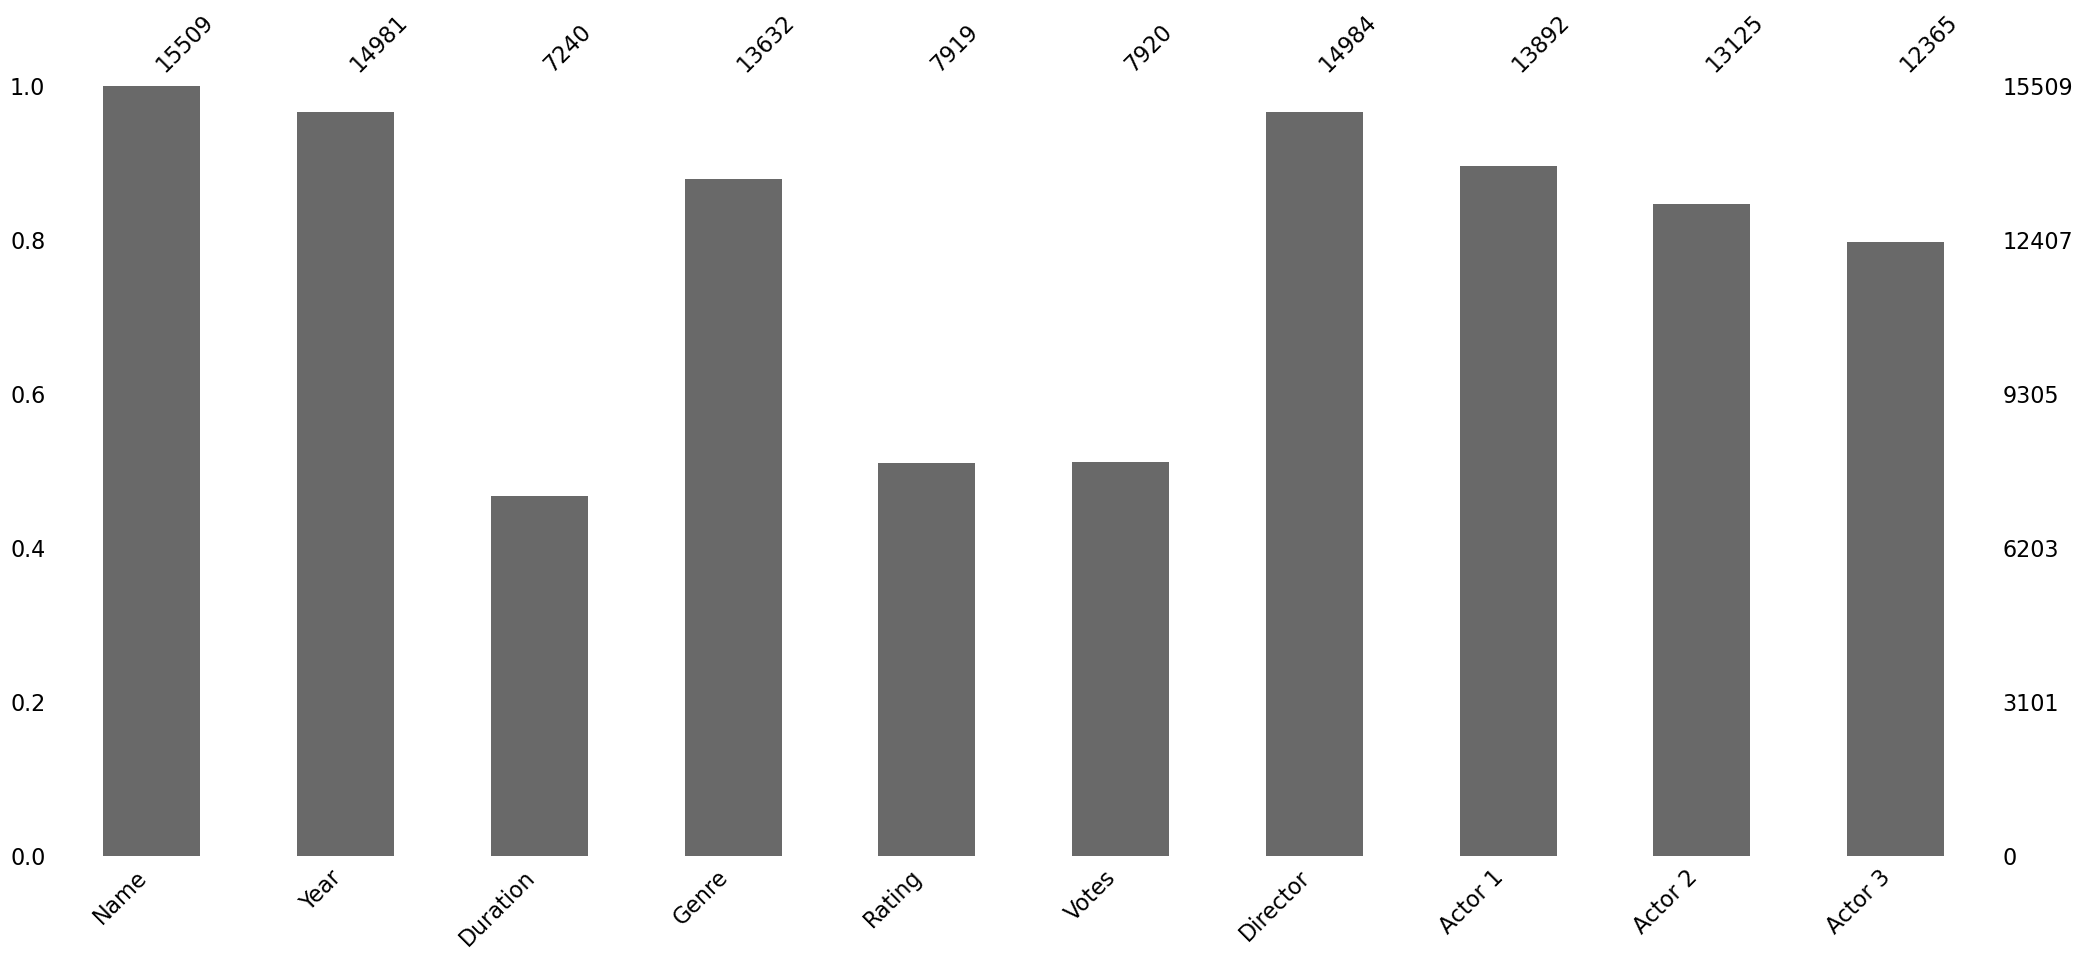

In [36]:
mg.bar(df)

The number of numerical features is 1


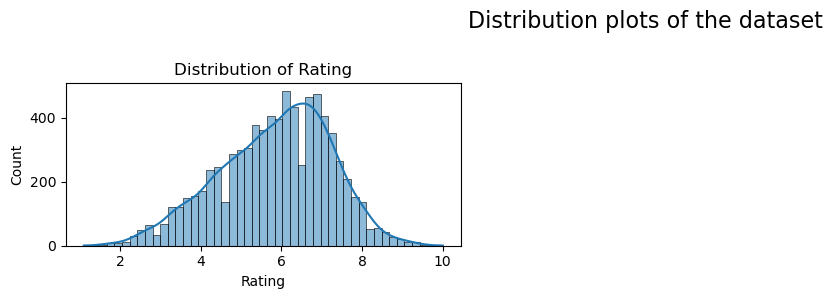

In [37]:
plot_distribution(df)

# Preprocessing of dataset

In [38]:
# Drop rows where Rating has missing values, since it is the target variable
df_movies_cleaned = df.dropna(subset=['Rating'])

# Convert Duration to numerical (remove 'min' and convert to integer)
df_movies_cleaned['Duration'] = df_movies_cleaned['Duration'].str.replace(' min', '').astype(float)

# Extract Year from the column (cleaning any extra characters)
df_movies_cleaned['Year'] = df_movies_cleaned['Year'].str.extract('(\d+)').astype(float)

# Remove commas and convert the Votes column to integer
df_movies_cleaned['Votes'] = df_movies_cleaned['Votes'].str.replace(',', '').astype(int)


/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_7836/1691400277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_cleaned['Duration'] = df_movies_cleaned['Duration'].str.replace(' min', '').astype(float)
/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_7836/1691400277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_cleaned['Year'] = df_movies_cleaned['Year'].str.extract('(\d+)').astype(float)
/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_7836/16914

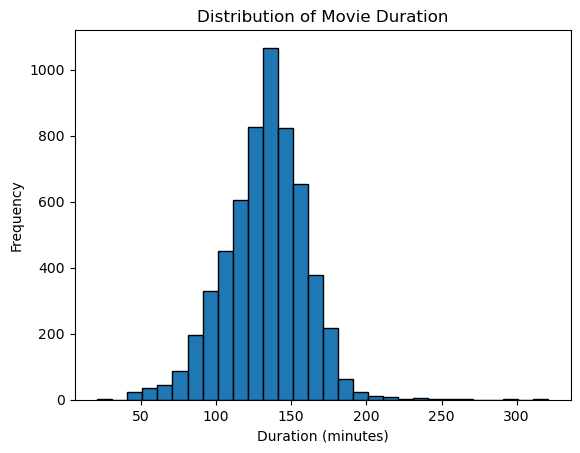

Skewness: -0.10512573621560897


In [39]:
# Plot a histogram of Duration to inspect the distribution
df_movies_cleaned['Duration'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Alternatively, check for skewness
skewness = df_movies_cleaned['Duration'].skew()
print(f'Skewness: {skewness}')

In [40]:
# Fill missing values in Age and Embarked variable
df_movies_cleaned['Duration'].fillna(df_movies_cleaned['Duration'].mean(), inplace=True)

/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_7836/2175979515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_cleaned['Duration'].fillna(df_movies_cleaned['Duration'].mean(), inplace=True)


In [41]:
df_movies_cleaned.isnull().sum()

Name          0
Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

## One hot encoding

In [42]:
# Spliting Genres from one column
df_movies_cleaned['Genre'] = df_movies_cleaned['Genre'].str.split(',').str[0]

# Apply one-hot encoding to the column
df_movies_encoded = pd.get_dummies(df_movies_cleaned, columns=['Genre','Director'], drop_first=True)

/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_7836/2517565433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_cleaned['Genre'] = df_movies_cleaned['Genre'].str.split(',').str[0]


In [43]:
# Drop redundent columns
df_final = df_movies_encoded.drop(['Name', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)

In [44]:
df_final.isnull().sum()

Year                      0
Duration                  0
Rating                    0
Votes                     0
Genre_Adventure           0
                         ..
Director_Zia Sarhadi      0
Director_Ziaullah Khan    0
Director_Zoya Akhtar      0
Director_Zubair Khan      0
Director_Zunaid Memon     0
Length: 3161, dtype: int64

# Split dataset

In [45]:
# Separate features (X) and target (y)
X = df_final.drop('Rating', axis=1)
y = df_final['Rating']


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 9628169046037.58
R² Score: -5178815163784.438
